In [42]:
%matplotlib notebook

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

In [43]:
os.getcwd()

'/Users/stephanieliu/Desktop/GitHub/SegundoSemestre/CD_Projeto3'

In [44]:
dados = pd.read_excel("HappinessAlcoholConsumption.xls")

In [45]:
dados.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


<IPython.core.display.Javascript object>


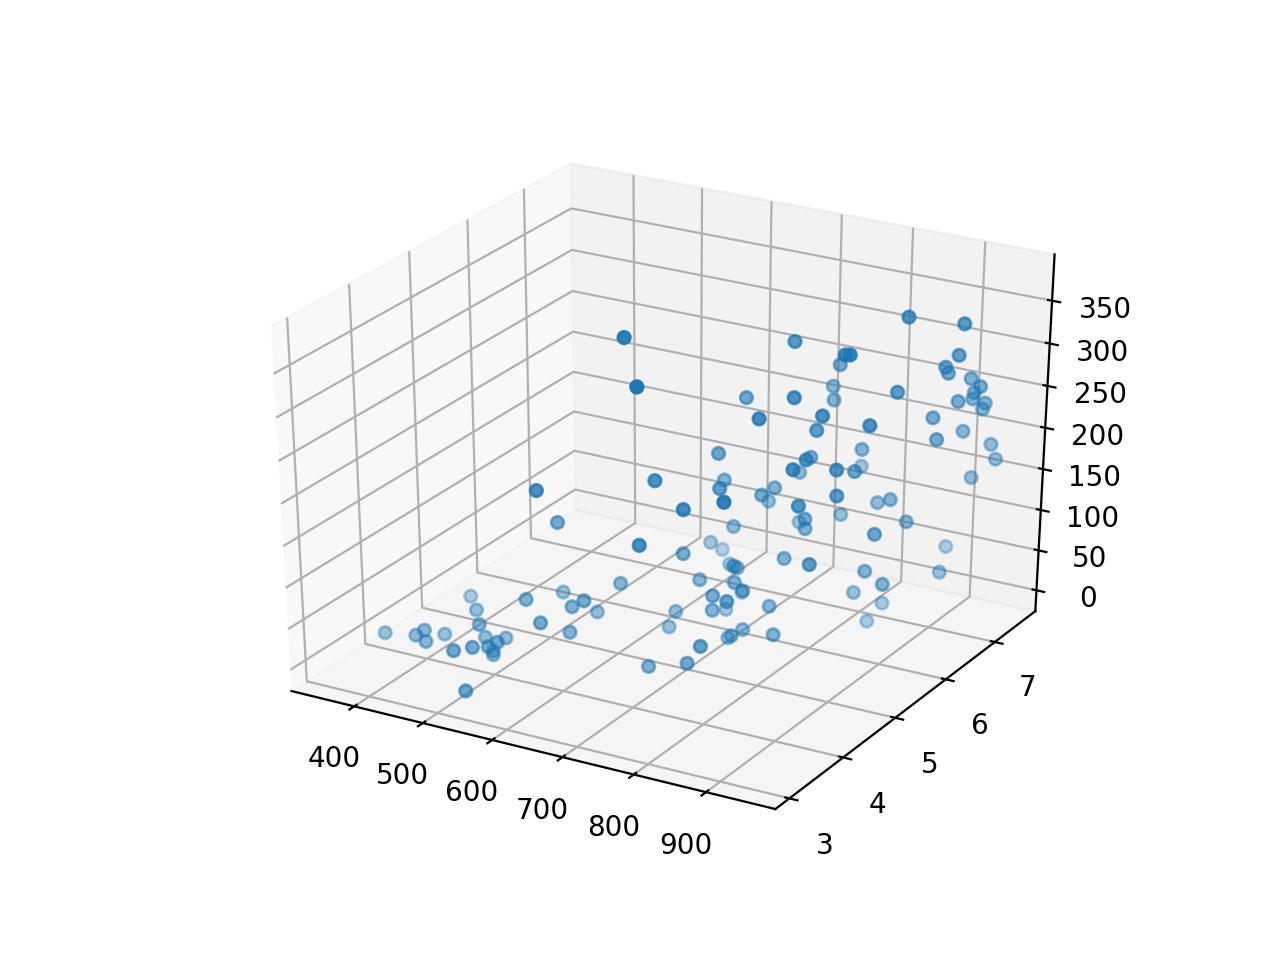

In [46]:
grafico = plt.figure().gca(projection="3d")
grafico.scatter(dados.HDI, dados.HappinessScore, dados.Beer_PerCapita)

In [47]:
dados_means = dados.loc[:,("HDI", "HappinessScore", "Beer_PerCapita")]

## Usando o clustering

In [48]:
k_means = cluster.MiniBatchKMeans(n_clusters=3)

In [49]:
k_means.fit(dados_means)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [50]:
resultados = k_means.predict(dados_means)

In [51]:
resultados

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [52]:
final = dados_means.copy()

In [53]:
final["classe"] = resultados

In [54]:
final.head(5)

,HDI,HappinessScore,Beer_PerCapita,classe
0,928,7.526,224,1
1,943,7.509,185,1
2,933,7.501,233,1
3,951,7.498,169,1
4,918,7.413,263,1


<IPython.core.display.Javascript object>


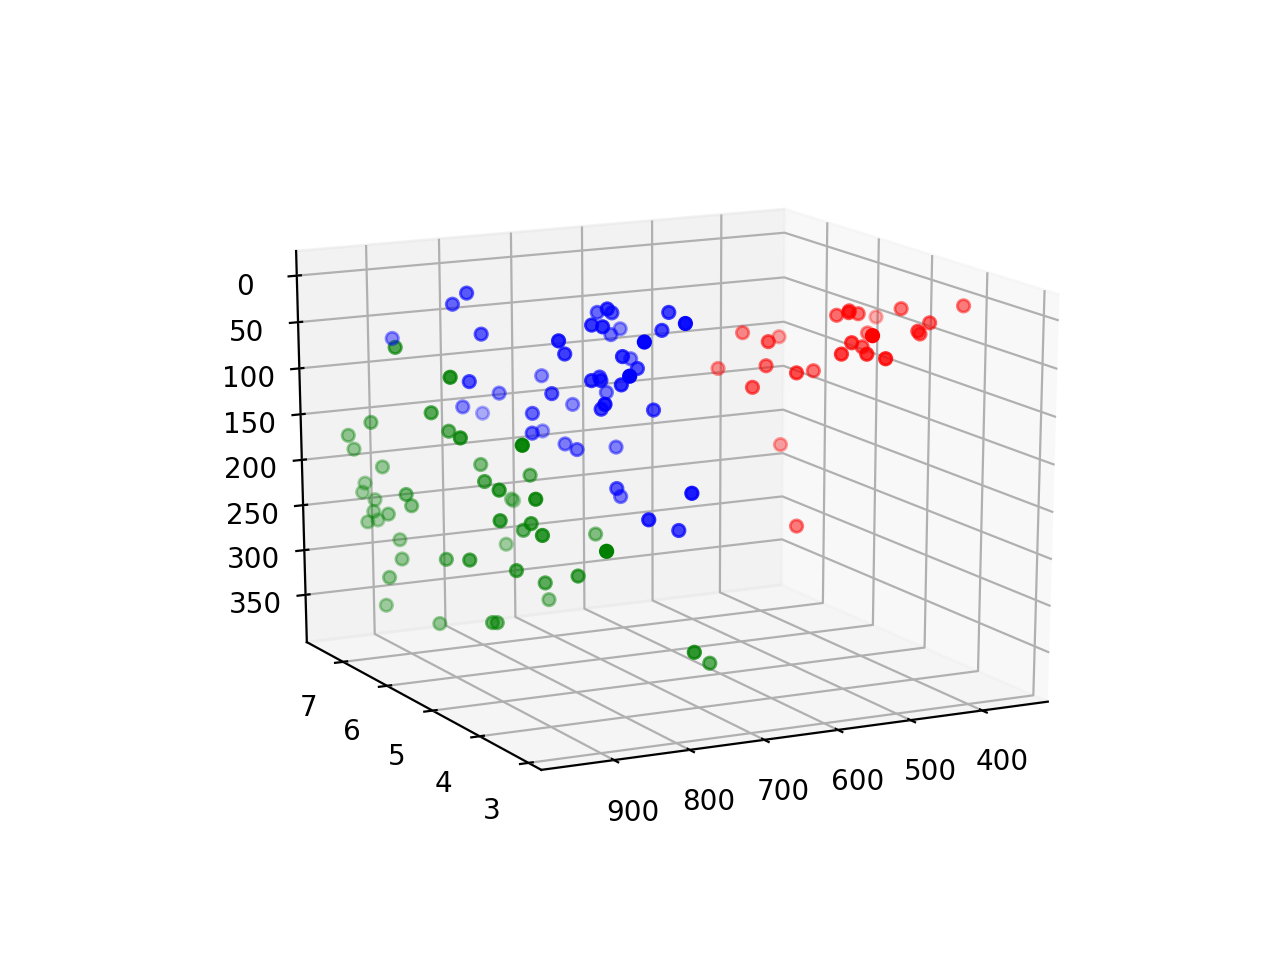

In [55]:
plt3d = plt.figure().gca(projection="3d")
grupo0 = final[final.classe==0]
grupo1 = final[final.classe==1]
grupo2 = final[final.classe==2]

plt3d.scatter(grupo0.HDI, grupo0.HappinessScore, grupo0.Beer_PerCapita, color="r")
plt3d.scatter(grupo1.HDI, grupo1.HappinessScore, grupo1.Beer_PerCapita, color="g")
plt3d.scatter(grupo2.HDI, grupo2.HappinessScore, grupo2.Beer_PerCapita, color="b")